In [ ]:
pip install prophet

# **Uber Demand Forecasting**

## **Objective**

To forecast daily ride demand in various cities using time series analysis techniques.

## **1. Importing Libraries**

**Theory:**

We use the following libraries:
- `pandas` and `numpy`: For data manipulation and numerical operations.
- `matplotlib.pyplot` and `seaborn`: For data visualization.
- `statsmodels` and `prophet`: For time series forecasting.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

## **2. Loading the Dataset**

**Theory:**

We load the dataset and inspect its structure to understand the available data.

In [ ]:
# Load the dataset
file_name = "uber_demand_data.csv"
df = pd.read_csv(file_name)

# Display the first few rows of the dataset
print("Dataset Overview:")
print(df.head())

# Check basic information about the dataset
print("\nDataset Information:")
df.info()

Dataset Overview:
         Date           City  Demand WeatherCondition DayOfWeek
0  2024-07-01       New York     624            Snowy    Monday
1  2024-07-01  San Francisco     761           Cloudy    Monday
2  2024-07-01        Chicago     413            Snowy    Monday
3  2024-07-02       New York     482           Stormy   Tuesday
4  2024-07-02  San Francisco     744           Cloudy   Tuesday

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1095 non-null   object
 1   City              1095 non-null   object
 2   Demand            1095 non-null   int64 
 3   WeatherCondition  1095 non-null   object
 4   DayOfWeek         1095 non-null   object
dtypes: int64(1), object(4)
memory usage: 42.9+ KB


## **3. Data Cleaning and Preprocessing**

**Theory:**

- Handle missing values.
- Convert the Date column to datetime format for time series analysis.
- Filter data for a specific city for analysis.

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for one city (e.g., New York)
city_data = df[df['City'] == 'New York'].copy()

# Set the Date column as the index
city_data.set_index('Date', inplace=True)

# Display filtered data
print("\nFiltered Data Sample:")
print(city_data.head())


Missing Values:
Date                0
City                0
Demand              0
WeatherCondition    0
DayOfWeek           0
dtype: int64

Filtered Data Sample:
                City  Demand WeatherCondition  DayOfWeek
Date                                                    
2024-07-01  New York     624            Snowy     Monday
2024-07-02  New York     482           Stormy    Tuesday
2024-07-03  New York    1197            Sunny  Wednesday
2024-07-04  New York     989            Windy   Thursday
2024-07-05  New York     900            Windy     Friday


## **4. Exploratory Data Analysis (EDA)**

### **4.1 Time Series Plot**

**Theory:**

Visualizing the time series helps identify patterns, trends, and seasonality.

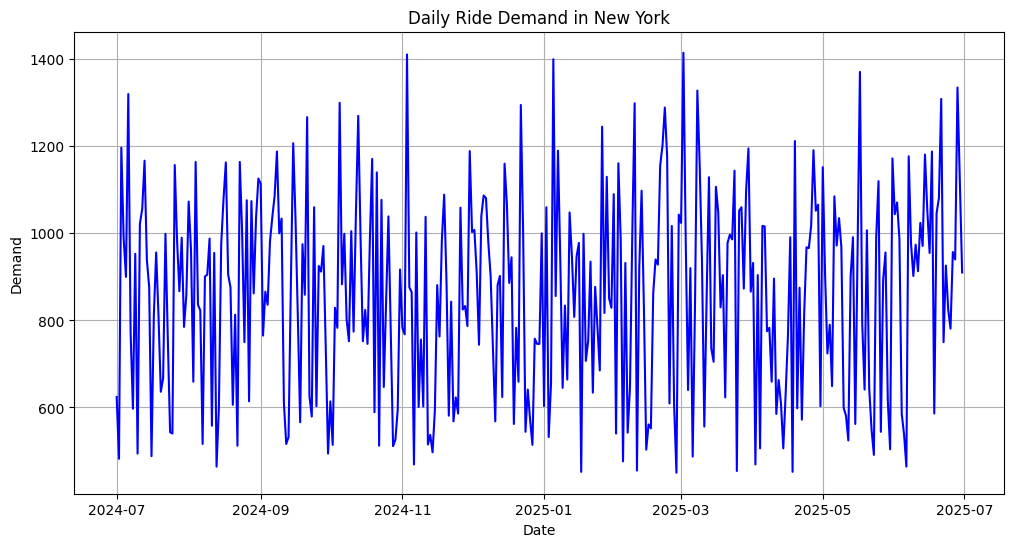

In [ ]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(city_data['Demand'], color='blue')
plt.title('Daily Ride Demand in New York')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.grid()
plt.show()

### **4.2 Decomposing the Time Series**

**Theory:**

Decomposing the time series separates it into trend, seasonal, and residual components.

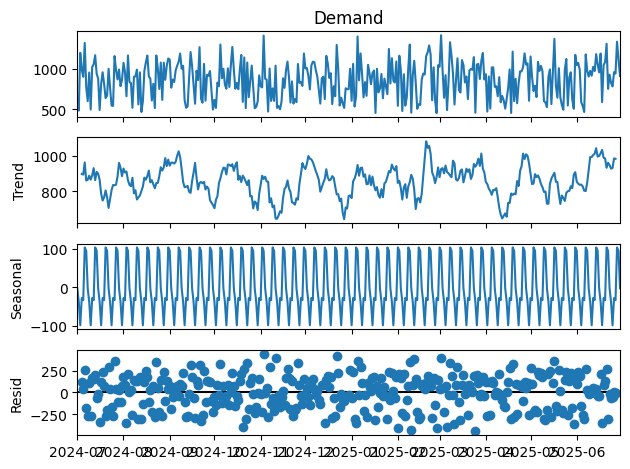

In [ ]:
# Decompose the time series
decomposition = seasonal_decompose(city_data['Demand'], model='additive', period=7)

# Plot the components
decomposition.plot()
plt.show()

## **5. Time Series Modeling**

### **5.1 ARIMA Model**

**Theory:**

ARIMA (AutoRegressive Integrated Moving Average) is a popular statistical model for time series forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


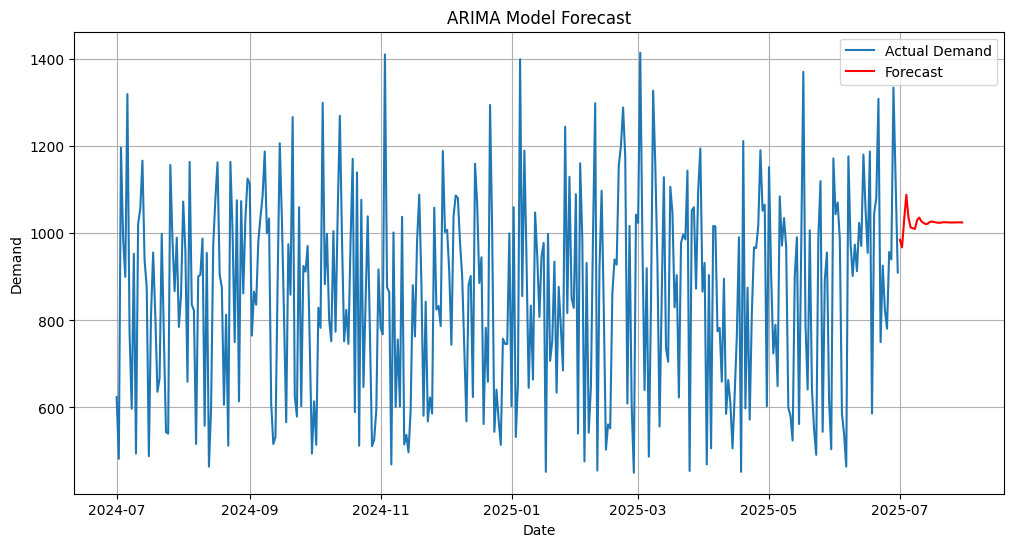

In [ ]:
# Fit an ARIMA model
model = ARIMA(city_data['Demand'], order=(5, 1, 0))  # Order: (p, d, q)
arima_model = model.fit()

# Forecast the next 30 days
forecast = arima_model.forecast(steps=30)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(city_data['Demand'], label='Actual Demand')
plt.plot(pd.date_range(city_data.index[-1] + pd.Timedelta(days=1), periods=30), forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.grid()
plt.show()

### **5.2 Prophet Model**

**Theory:**

Prophet is a forecasting tool developed by Facebook, suitable for handling seasonality and holidays.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm6eyc756/4wz4jjq6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm6eyc756/cdfeep9w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9476', 'data', 'file=/tmp/tmpm6eyc756/4wz4jjq6.json', 'init=/tmp/tmpm6eyc756/cdfeep9w.json', 'output', 'file=/tmp/tmpm6eyc756/prophet_modelpo1zxvnn/prophet_model-20250910113523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:35:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:35:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


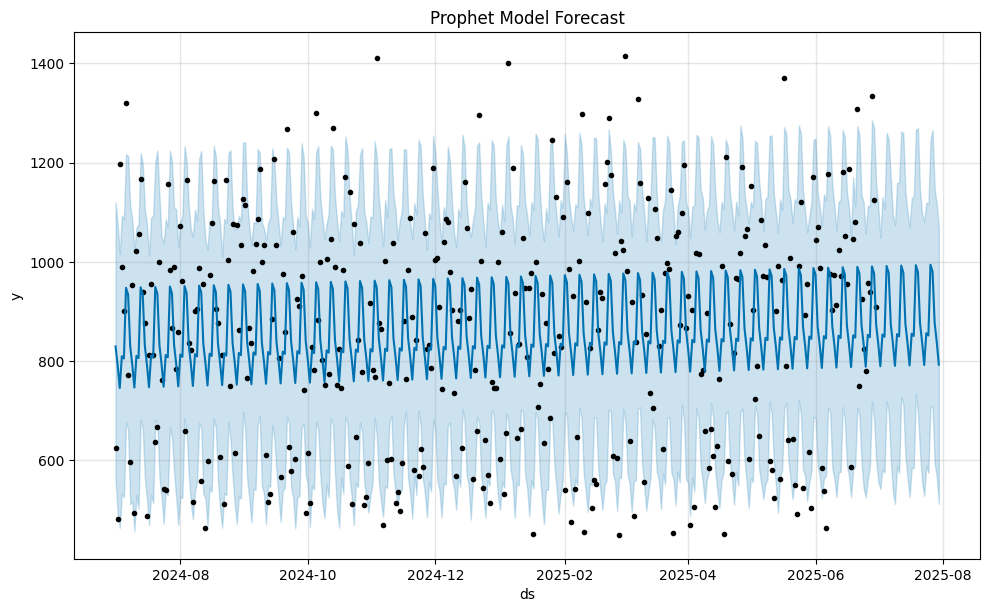

In [ ]:
# Prepare data for Prophet
prophet_data = city_data.reset_index()[['Date', 'Demand']].rename(columns={'Date': 'ds', 'Demand': 'y'})

# Fit the Prophet model
prophet = Prophet()
prophet.fit(prophet_data)

# Forecast the next 30 days
future = prophet.make_future_dataframe(periods=30)
forecast = prophet.predict(future)

# Plot the forecast
fig = prophet.plot(forecast)
plt.title('Prophet Model Forecast')
plt.show()

## **6. Model Evaluation**

**Theory:**

Evaluate the model using metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluate ARIMA
arima_predictions = arima_model.predict(start=0, end=len(city_data)-1)
arima_mae = mean_absolute_error(city_data['Demand'], arima_predictions)
arima_rmse = np.sqrt(mean_squared_error(city_data['Demand'], arima_predictions))

print(f"ARIMA Model - MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}")

ARIMA Model - MAE: 200.27, RMSE: 247.54


## **7. Saving the Model**

**Theory:**

Save the trained model for future use.

In [ ]:
# Save the ARIMA model
import joblib

arima_model_filename = "uber_demand_arima_model.pkl"
joblib.dump(arima_model, arima_model_filename)
print(f"ARIMA model saved as {arima_model_filename}")

ARIMA model saved as uber_demand_arima_model.pkl
